<a href="https://colab.research.google.com/github/fajril000/Create-simple-loop-/blob/main/ImageEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

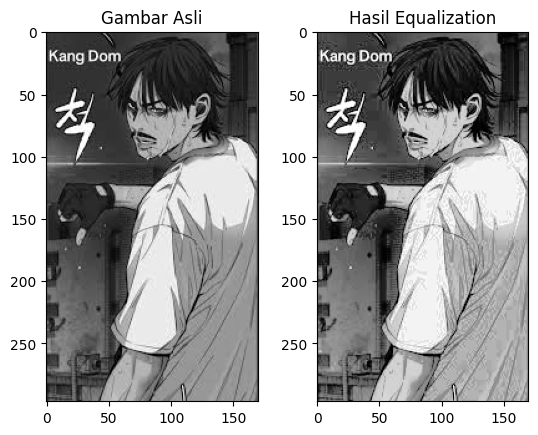

In [2]:
import cv2
from matplotlib import pyplot as plt

# Baca gambar grayscale
img = cv2.imread('images.jpeg', 0)

# Histogram Equalization
equ = cv2.equalizeHist(img)

# Tampilkan gambar asli dan hasil equalization
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Gambar Asli')
plt.subplot(122), plt.imshow(equ, cmap='gray'), plt.title('Hasil Equalization')
plt.show()

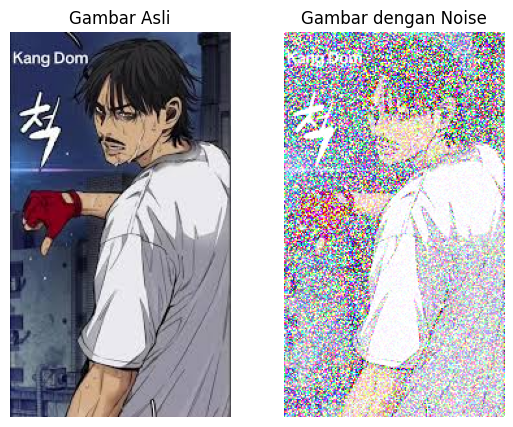

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar
img = cv2.imread('images.jpeg')

# Tambahkan Gaussian noise pada gambar (secara manual, menggunakan normal idstribution)
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, gaussian_noise) #penambahan noise

# Terapkan Gaussian Blur untuk Noise Reduction
blurred = cv2.GaussianBlur(noisy_img, (5, 5), 0)

# Konversi gambar dari BGR ke RGB untuk Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli, noisy, dan hasil Gaussian Blur
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img_rgb)
plt.title('Gambar dengan Noise')
plt.axis('off')

plt.show()

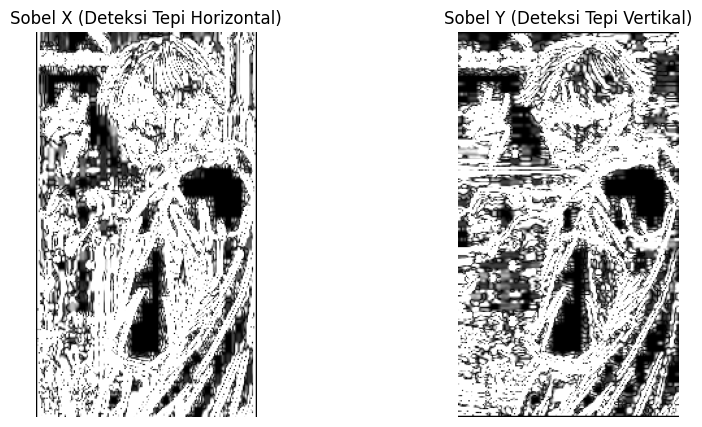

In [5]:
import cv2
from matplotlib import pyplot as plt

# Baca Gambar grayscale
img = cv2.imread('images.jpeg', 0)

# Terapkan Sobel Filter untuk mendeteksi tepi secara horizontal dan vertikal
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5) # Sobel X
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5) # Sobel Y

# Konversi hasil deteksi tepi ke bentuk absolut dan tipe 8-bit (0-255) agar mudah ditampilkan
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)

# Tampilkan hasil deteksi tepi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X (Deteksi Tepi Horizontal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y (Deteksi Tepi Vertikal)')
plt.axis('off')

plt.show()

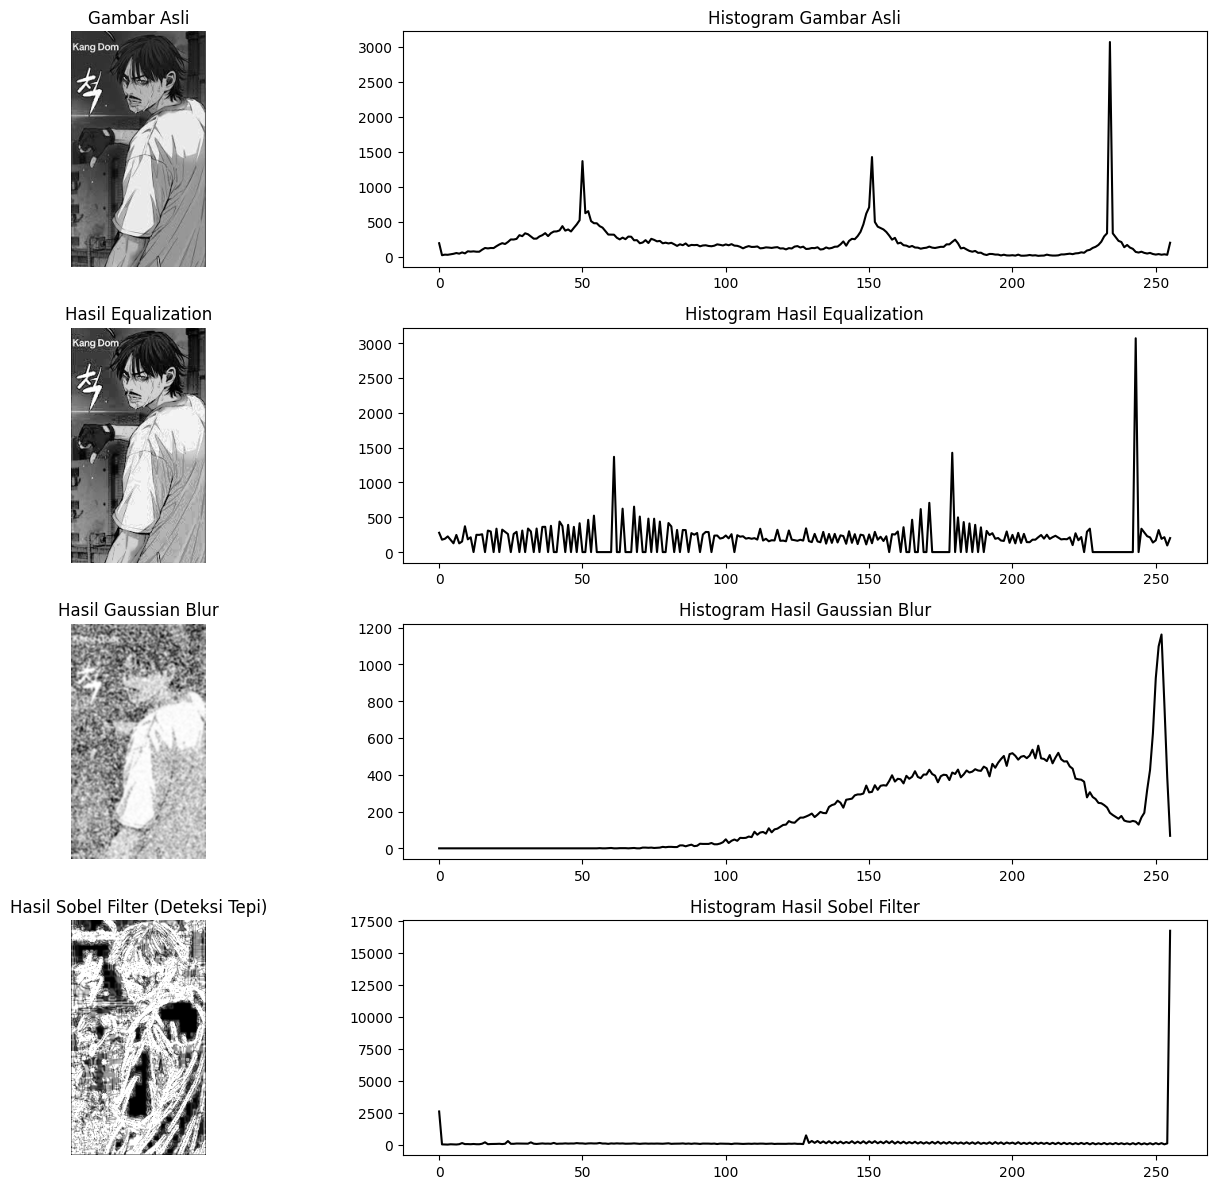

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar grayscale
img = cv2.imread('images.jpeg', 0)

# Histogram Equalization
equ = cv2.equalizeHist(img)

# Tambahkan Gaussian noise pada gambar (secara manual, menggunakan normal distribution)
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, gaussian_noise)  # Penambahan noise

# Terapkan Gaussian Blur untuk Noise Reduction
blurred = cv2.GaussianBlur(noisy_img, (5, 5), 0)

# Terapkan Sobel Filter untuk deteksi tepi
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)  # Sobel X
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Y

# Gabungkan Sobel X dan Sobel Y
edges = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

# Hitung histogram gambar asli, hasil equalization, hasil Gaussian blur, dan hasil Sobel filter
hist_img = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equ = cv2.calcHist([equ], [0], None, [256], [0, 256])
hist_blurred = cv2.calcHist([blurred], [0], None, [256], [0, 256])
hist_edges = cv2.calcHist([edges], [0], None, [256], [0, 256])

# Tampilkan gambar asli, equalization, Gaussian blur, Sobel filter, dan histogram masing-masing
plt.figure(figsize=(15, 12))

# Gambar Asli
plt.subplot(4, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.plot(hist_img, color='black')
plt.title('Histogram Gambar Asli')

# Hasil Equalization
plt.subplot(4, 2, 3)
plt.imshow(equ, cmap='gray')
plt.title('Hasil Equalization')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.plot(hist_equ, color='black')
plt.title('Histogram Hasil Equalization')

# Hasil Gaussian Blur
plt.subplot(4, 2, 5)
plt.imshow(blurred, cmap='gray')
plt.title('Hasil Gaussian Blur')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.plot(hist_blurred, color='black')
plt.title('Histogram Hasil Gaussian Blur')

# Hasil Sobel Filter (Deteksi Tepi)
plt.subplot(4, 2, 7)
plt.imshow(edges, cmap='gray')
plt.title('Hasil Sobel Filter (Deteksi Tepi)')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.plot(hist_edges, color='black')
plt.title('Histogram Hasil Sobel Filter')

plt.tight_layout()
plt.show()